In [1]:
import numpy as np
import matplotlib.pyplot as plot

Voy a crear la linea guia a la cual le agregare ruido y luego intentare reconstruirla

time shape (100,)


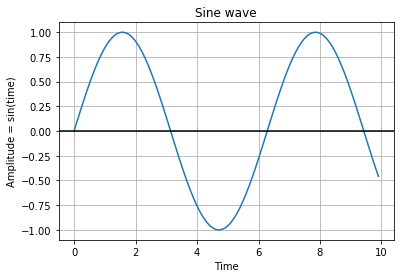

In [2]:
time = np.arange(0, 10, 0.1) # la cantidad de datos tomados por segundo es el ultimo valor
amplitude = np.sin(time)
print('time shape', time.shape)
plot.plot(time, amplitude)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

Ahora voy a poner ruido a la linea guia

amplitude (100,)
signal (100,)


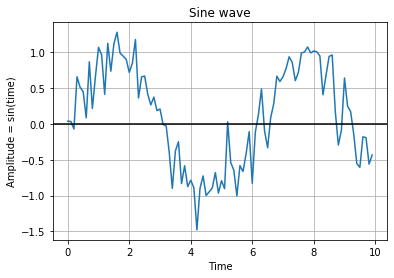

In [3]:
error = 1
print('amplitude',amplitude.shape)
signal = np.zeros(amplitude.shape)
print('signal', signal.shape)

# ### error simple
# for i, item in enumerate(amplitude):
#     signal[i] = np.random.uniform(low=item-error, high=item+error)
    
### para variar el error aun mas
temp_error = 0
for i, item in enumerate(amplitude):
    temp_error = np.random.uniform(low=-error, high=error)
    signal[i] = np.random.uniform(low=item-temp_error, high=item+temp_error)
    
plot.plot(time, signal)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

Ahora que tengo  una señal con ruido voy a intentar quitar el ruido y recontruir la señal original

METODO 1 el promedio

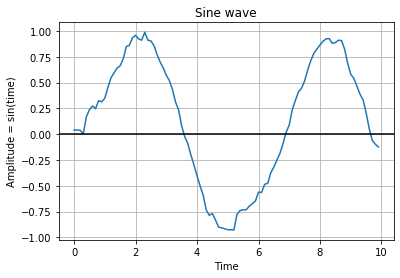

In [4]:
reconstruction = np.zeros(amplitude.shape)
mean = 10

for i, item in enumerate(signal):
    if i == 0:
        reconstruction[i] = item
    elif i < mean:
        reconstruction[i] = np.mean(signal[i-i:i])
    else:
        reconstruction[i] = np.mean(signal[i-mean:i])

plot.plot(time, reconstruction)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

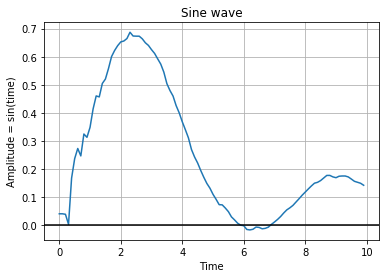

In [5]:
reconstruction = np.zeros(amplitude.shape)
mean = 100

for i, item in enumerate(signal):
    if i == 0:
        reconstruction[i] = item
    elif i < mean:
        reconstruction[i] = np.mean(signal[i-i:i])
    else:
        reconstruction[i] = np.mean(signal[i-mean:i])

plot.plot(time, reconstruction)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

Si cambio la cantidad de datos de inicio el promedio de 100 se vuelve mucho mejor que el de 10

METRODO 2 rango de datos ( aun no esta completo la idea que tenia)

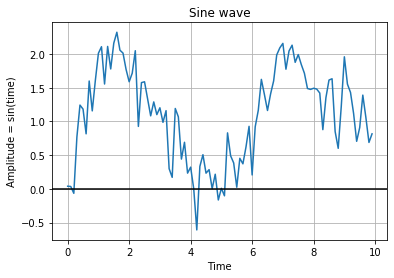

In [6]:
reconstruction = np.zeros(amplitude.shape)
mean = 10

for i, item in enumerate(signal):
    if i == 0:
        reconstruction[i] = item
    elif i < mean:
        i_max = np.amax(signal[i-i:i])
        i_min = np.amin(signal[i-i:i])
        reconstruction[i] = (i_max - i_min) + item
    else:
        i_max = np.amax(signal[i-mean:i])
        i_min = np.amin(signal[i-mean:i])
        reconstruction[i] = (i_max - i_min) + item

plot.plot(time, reconstruction)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

METODO 3 kalman filter

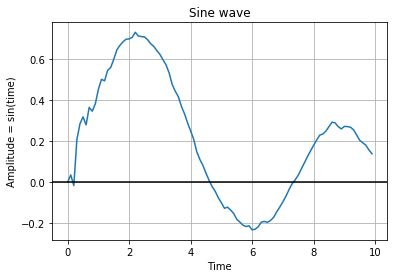

In [7]:
reconstruction = np.zeros(amplitude.shape)
Q = 1e-5 # process variance

# allocate space for arrays
P=np.zeros(amplitude.shape)         # a posteri error estimate
xhatminus=np.zeros(amplitude.shape) # a priori estimate of x
Pminus=np.zeros(amplitude.shape)    # a priori error estimate
K=np.zeros(amplitude.shape)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
# xhat[0] = 0.0
P[0] = 1.0

for k in range(1,len(signal)):
    # time update
    xhatminus[k] = reconstruction[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    reconstruction[k] = xhatminus[k]+K[k]*(signal[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plot.plot(time, reconstruction)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()